In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import StandardScaler


In [2]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


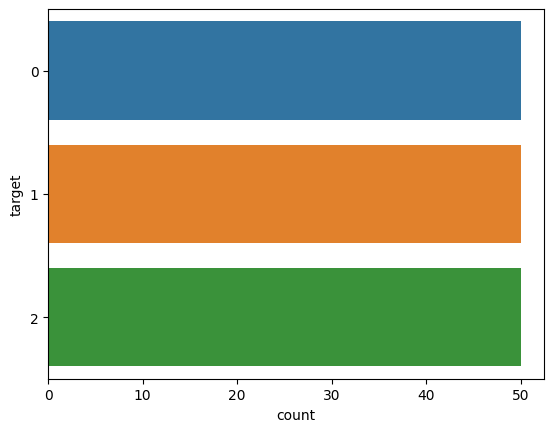

In [5]:
sns.countplot(y=df.target, data=df)
plt.show()

<Axes: >

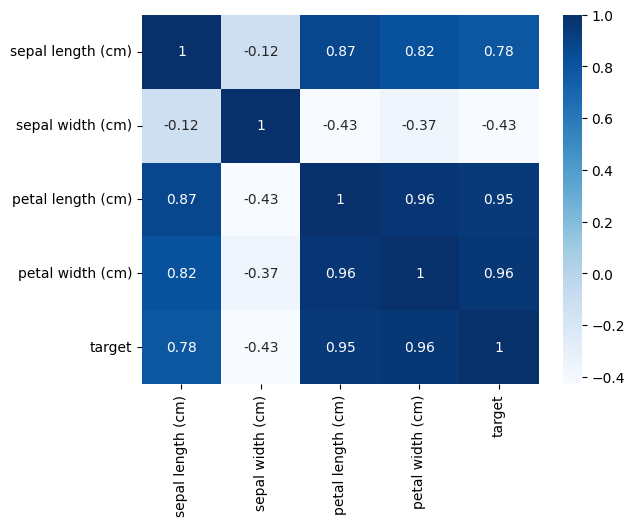

In [6]:
sns.heatmap(df.corr(), annot=True, cmap='Blues')

In [7]:
X = df.drop(['target'], axis=1)
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
y = df['target']
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2)
knn_clf = KNeighborsClassifier(7)
knn_clf.fit(X_train, y_train)
KNeighborsClassifier(n_neighbors=7)
print("Train score before PCA",knn_clf.score(X_train,y_train),"%")
print("Test score before PCA",knn_clf.score(X_test,y_test),"%")

Train score before PCA 0.975 %
Test score before PCA 0.9666666666666667 %


In [10]:
from sklearn.decomposition import PCA

pca = PCA()
X_new = pca.fit_transform(X)
pca.get_covariance()


array([[ 0.05290845, -0.00491134,  0.05999602,  0.05975355],
       [-0.00491134,  0.03298254, -0.02328082, -0.02111795],
       [ 0.05999602, -0.02328082,  0.08952249,  0.09149784],
       [ 0.05975355, -0.02111795,  0.09149784,  0.10086914]])

In [11]:
explained_var = pca.explained_variance_ratio_
explained_var

array([0.84136038, 0.11751808, 0.03473561, 0.00638592])

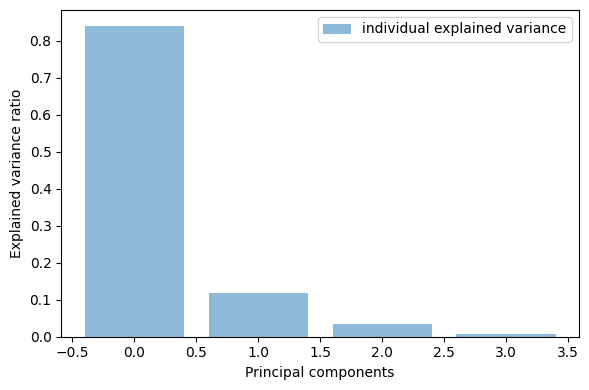

In [12]:
# with plt.style.context('dark_background'):
plt.figure(figsize=(6, 4))
plt.bar(range(4), explained_var, alpha=0.5, align='center',
label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

In [13]:
scalar = StandardScaler()
scaled_data = pd.DataFrame(scalar.fit_transform(df)) #scaling the data
scaled_data
pca = PCA(n_components = 3)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3'])
data_pca.head()

,PC1,PC2,PC3
0,-2.576120,0.474499,-0.054364
1,-2.415322,-0.678092,-0.203080
2,-2.659333,-0.348282,0.112681
3,-2.601991,-0.603306,0.134288
4,-2.683744,0.640220,0.102711


<Axes: >

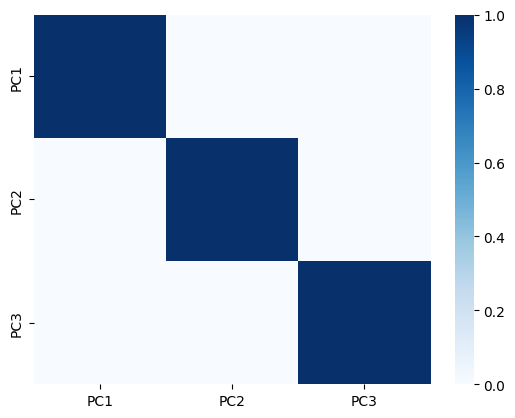

In [14]:
sns.heatmap(data_pca.corr(),cmap='Blues')

In [15]:
pca=PCA(n_components=3)
X_new=pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_new, y,
test_size=0.2)
knn_clf = KNeighborsClassifier(7)
knn_clf.fit(X_train, y_train)
KNeighborsClassifier(n_neighbors=7)
print("Train score after PCA",knn_clf.score(X_train,y_train),"%")
print("Test score after PCA",knn_clf.score(X_test,y_test),"%")

Train score after PCA 0.9666666666666667 %
Test score after PCA 0.9333333333333333 %
